In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cwd = str(Path.cwd())
X = pd.read_csv(cwd + "/../data/Featchers_randomized.csv").sort_index(axis=1)
Y = pd.read_csv(cwd + "/../data/Goals_randomized.csv").sort_index(axis=1)
D = pd.read_csv(cwd + "/../data/Timings_randomized.csv").sort_index(axis=1)

# Verbinde die DataFrames
Data = pd.concat([X, Y], axis=1)

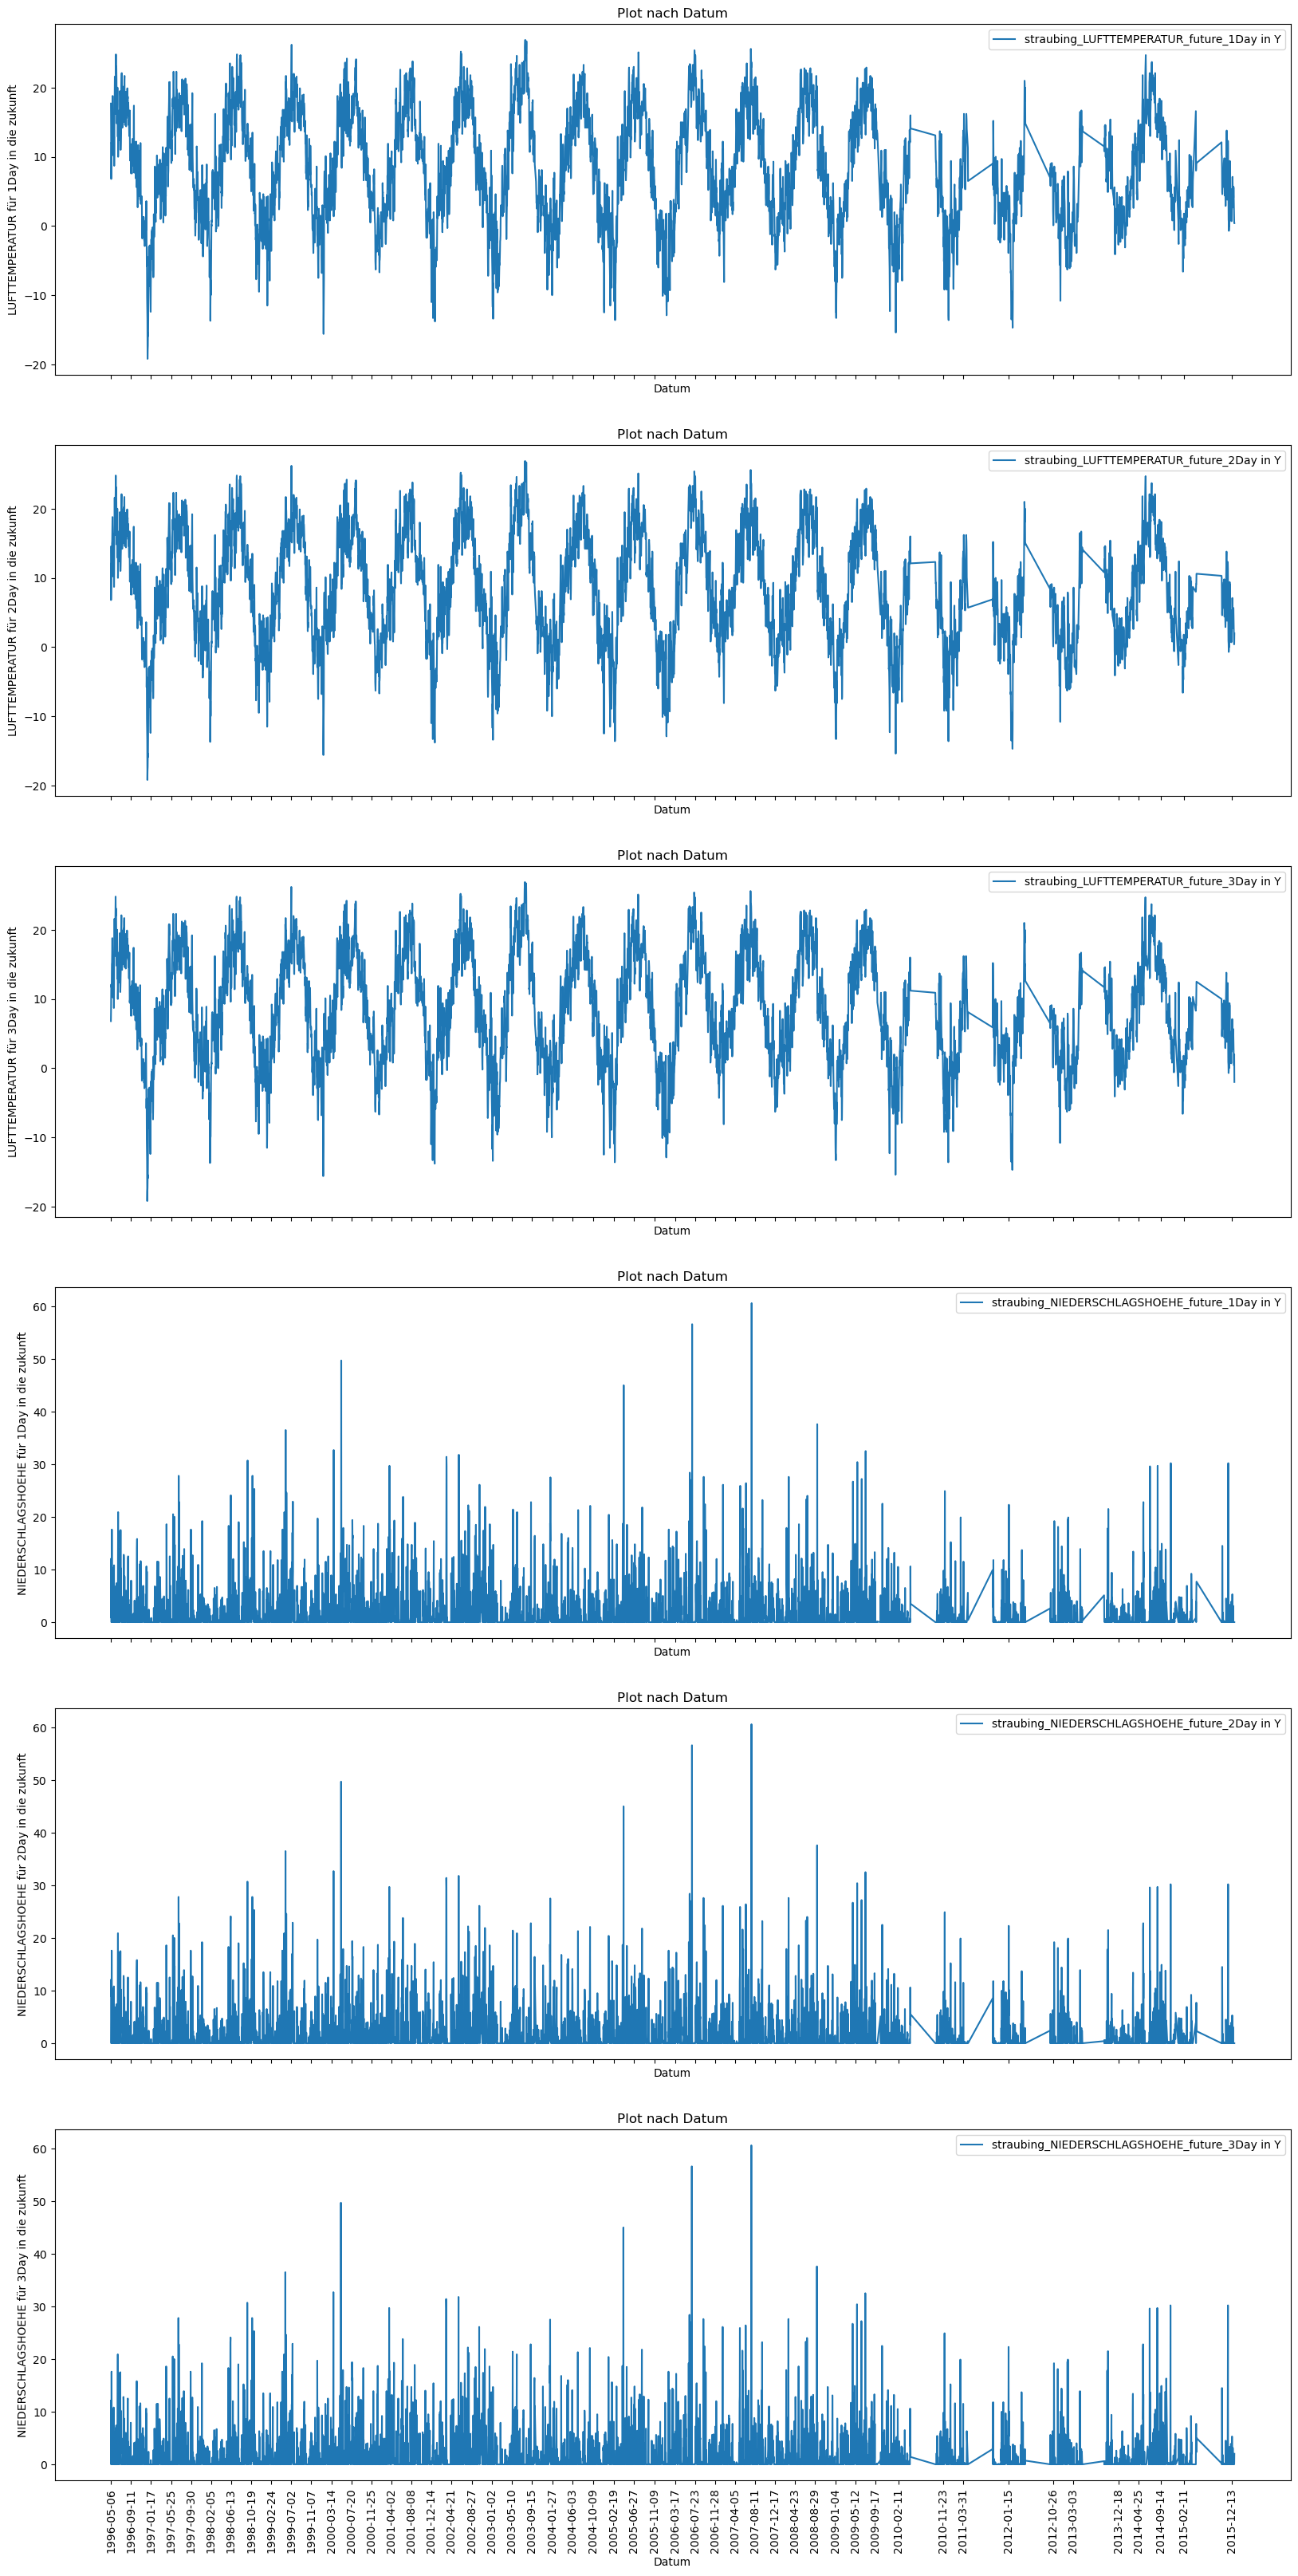

In [3]:
# Sortiere beide DataFrames nach einer gemeinsamen Spalte (z.B., 'straubing_DATE' in D)
D['straubing_DATE'] = pd.to_datetime(D['straubing_DATE'], format='%d.%m.%Y')

D_sorted = D.sort_values(by='straubing_DATE')
Y_sorted = Y.reindex(D_sorted.index)  # Sortiere Y basierend auf der Sortierung von D
D_sorted = D_sorted.reset_index(drop=True)
Y_sorted = Y_sorted.reset_index(drop=True)

# Wähle jeden zweiten Datenpunkt für die x-Achse aus
x_ticks = D_sorted['straubing_DATE'][::128]

# Plotte die Daten von Y
fig, axs = plt.subplots(nrows=len(Y_sorted.columns), figsize=(20, 40), sharex=True)

for i, column in enumerate(Y_sorted.columns):
    parts = column.split('_')
    axs[i].plot(D_sorted['straubing_DATE'], Y_sorted[column], label=f"{column} in Y")
    axs[i].set_ylabel(f"{parts[1]} für {parts[3]} in die zukunft")
    axs[i].legend()
    axs[i].set_xlabel('Datum')
    axs[i].set_title('Plot nach Datum')
    
plt.xticks(x_ticks, rotation=90)  # Ändere die Rotation nach Bedarf
plt.savefig('data_plot.png')
plt.show()

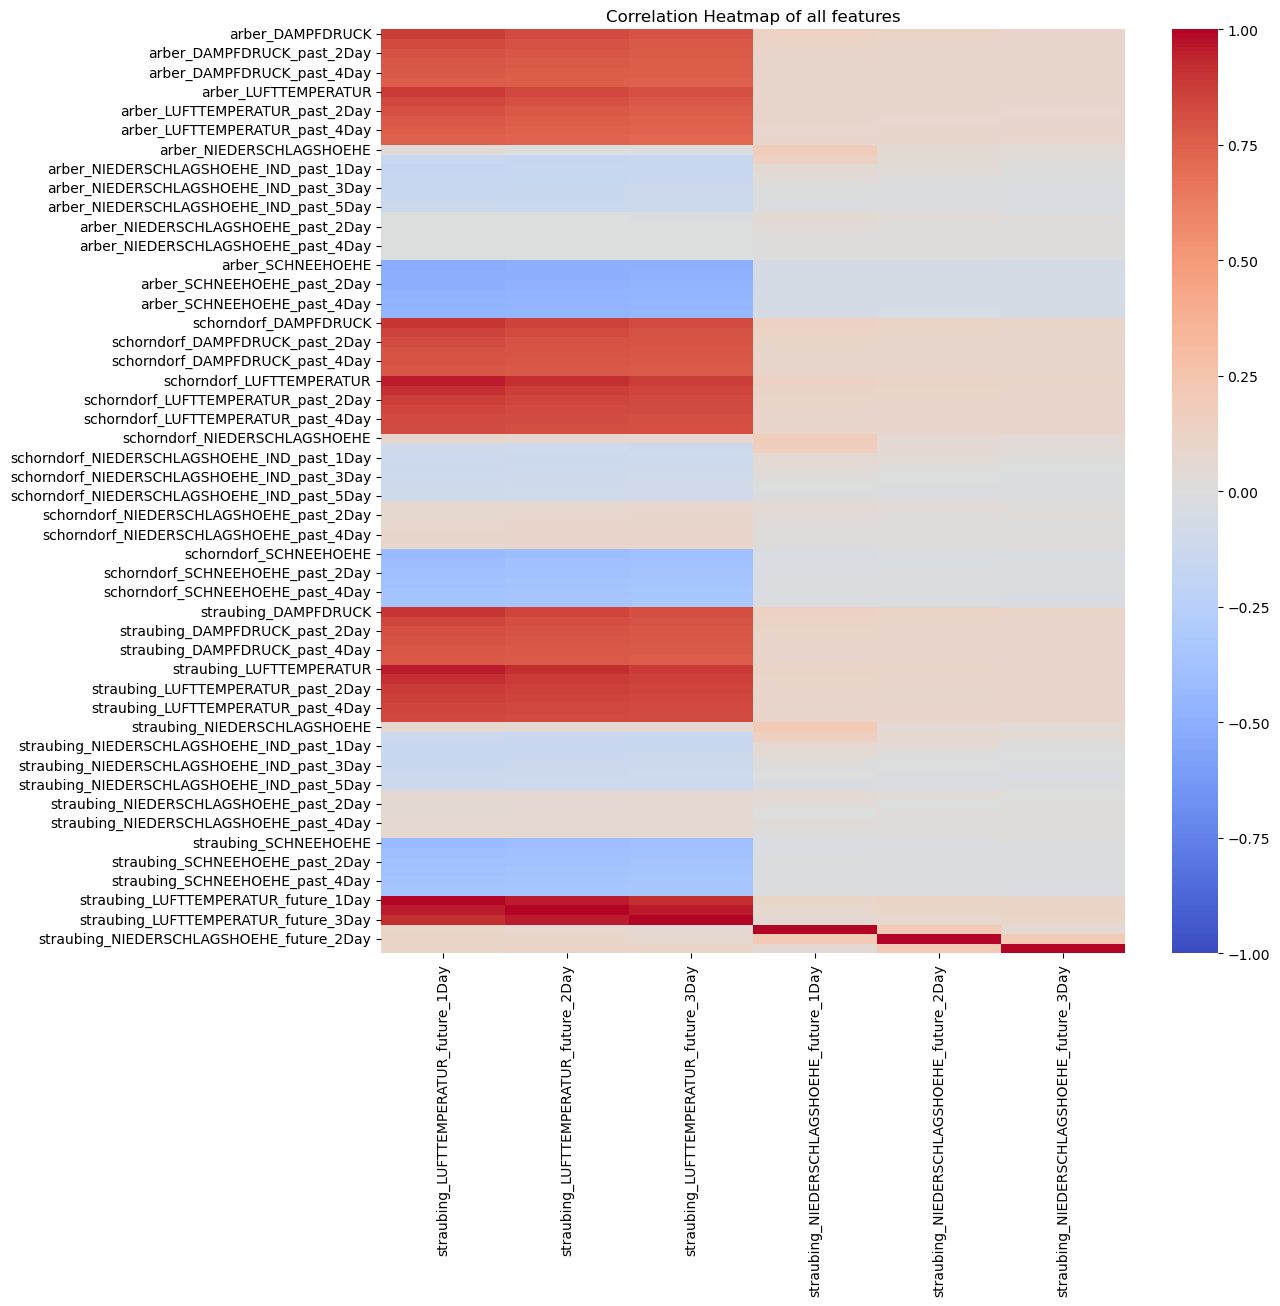

In [4]:
# Plot the corelation-heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(Data.corr()[Y.columns], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of all features')
plt.savefig('heatmap_cleaned.png')
plt.show()

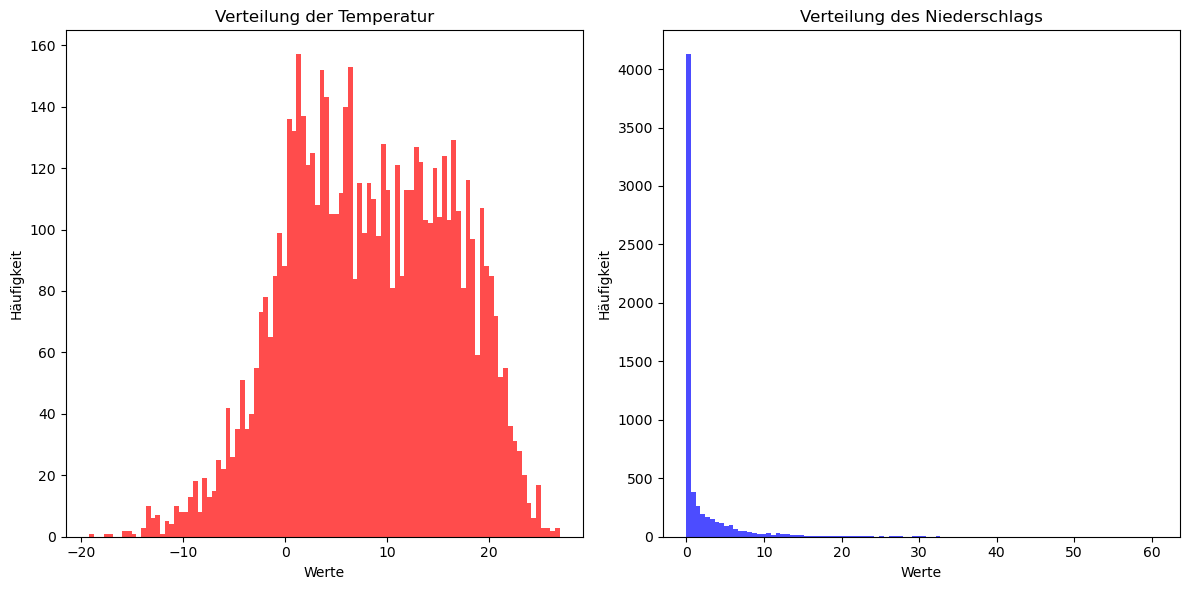

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X['straubing_LUFTTEMPERATUR'], bins=100, color='red', alpha=0.7)
plt.title('Verteilung der Temperatur')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')

plt.subplot(1, 2, 2)
plt.hist(X['straubing_NIEDERSCHLAGSHOEHE'], bins=100, color='blue', alpha=0.7)
plt.title('Verteilung des Niederschlags')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.savefig('verteilung_daten.png')
plt.show()